## Before we start:
* Final assignment available on EduFlow during Monday class.

### A few questions:
* **Other tools for visualization:**
  * [Power BI](https://powerbi.microsoft.com/)
  * [Looker Studio](https://lookerstudio.google.com/) (formerly Google Data Studio)
  * [Tableau](https://www.tableau.com/)
  * +++ A host of other solutions
* **Why Python & Pandas vs other more accessible visualization tools?**
  * In short: Python for scale, performance, flexability > SPEED.
  * Combine them:
    * Python to get, filter, merge data (e.g. via API)
    * Initial analysis/QA using visualization (e.g. Pandas)
    * Generate output (csv/excel/json)
    * Load into Power BI/Tableau etc for further analysis and more advanced visualizations.
  * Typically Python for EDA (Exploratory Data Analysis); Power BI etc for more general analysis / business reporting.
* **Assignment 4.3**
  * Objective 2 - Confusion about question/wording, uncertainty about grouping/sum
  * Objective 3 - Color bars


# 4.4 Visualizing Data in Python

## [Seaborn](https://seaborn.pydata.org/tutorial/introduction)
* Uses matplotlib as it's engine, just like pandas
* More aesthetically pleasing and modern, better for higher-quality visualizations

Why? Important to know about available resources, specially common ("best practice") ones with widespread industry usage, solid documentation and strong community support.

In [ ]:
# Import alias "sns" -> "seaborn namespace" or name play on actor "Samuel Norman Seaborn"
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import randint 

In [ ]:
df = pd.DataFrame({
    "Income" :[randint(0,1000) for x in range(30)],
    "Expenses" : [randint(0,1000) for x in range(30)]})
df.head()

### Updating scatter plots

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://www.geeksforgeeks.org/seaborn-regression-plots/

# Since only one graph, no need to reference plt.figure or create a grid 
sns.regplot(data=df, x="Income", y="Expenses")
plt.show()

### Updating Histogram plots

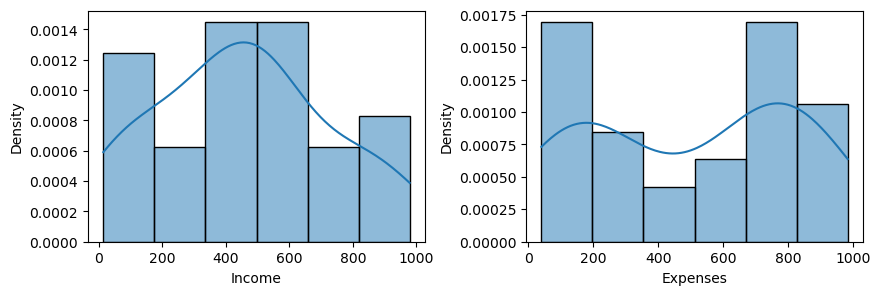

In [201]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot
# Shows both a histogram (using density normalization) and a superimposed kernel density estimate (if kde=True and stat="density")
# Default bin size is determined using a reference rule that depends on the sample size and variance
# Heads up! distplot() i DEPRECATED

fig = plt.figure(figsize=(10,3))
income_axes = fig.add_subplot(1,2,1)
expense_axes = fig.add_subplot(1,2,2)

# Plot data
sns.histplot(df["Income"], ax=income_axes, kde=True, stat="density")
sns.histplot(df["Expenses"], ax=expense_axes, kde=True, stat="density")
plt.subplots_adjust(wspace=.3)
plt.show()

### Box plots

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot
# https://www.geeksforgeeks.org/box-plot/
# Depicts data through their quartiles

sns.boxplot(data=df, orient="h")
plt.show()

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot.png" style="width: 600px;"/>

## Use Cases for Visualization

In [ ]:
sales_df = pd.read_excel("Sales_September2019.xlsx")
sales_df.head(10)

#### 1. What city had the highest number of sales?

In [ ]:
# Group by purchase adress, sum on quantity ordered
grouped_by_quant_city_df = sales_df["Quantity Ordered"].groupby(sales_df["Purchase Address"]).sum()
#grouped_by_quant_city_df = sales_df.groupby(sales_df["Purchase Address"]).sum(numeric_only=True)[["Quantity Ordered"]]
# Only want city name
grouped_by_quant_city_df.index = [x.split()[-1] for x in grouped_by_quant_city_df.index]
grouped_by_quant_city_df.index.name = "City"
grouped_by_quant_city_df

In [ ]:
# Display with Pandas

grouped_by_quant_city_df.plot.barh()
plt.show()

In [ ]:
# Display with Pandas (color/grid)

grouped_by_quant_city_df.plot.barh(color=["b", "g", "r", "c", "m", "y", "k"])

plt.grid(axis="x")
plt.show()

In [ ]:
# Display with Pandas (label/title etc)

fig = plt.figure()
quant_city_ax = fig.add_subplot()

grouped_by_quant_city_df.plot.barh(ax=quant_city_ax, color=["b", "g", "r", "c", "m", "y", "k"])

quant_city_ax.set_title("Total items sold per store")
quant_city_ax.set_xlabel("Location by City")
quant_city_ax.set_ylabel("Quantity Ordered")
plt.grid(axis="x")
plt.show()

In [ ]:
# Display with Seaborn

sns.barplot(x=grouped_by_quant_city_df,
            y=grouped_by_quant_city_df.index,
            width=.4,
            saturation=1,
            orient="h").set_title("Total items sold per store", fontdict={"size": 18, "weight": "bold", "color": "red"})
plt.show()

#### 2. What items were sold the most and why?

Our hypothesis: Price of the item may influence the quantity of each item sold.

In [ ]:
# Any correlation between price and quantity sold?

product_by_quant_price_df = sales_df.groupby(sales_df["Product"]).agg({
    "Quantity Ordered" : "sum",
    "Price Each" : "median"}).sort_values(by="Price Each")
product_by_quant_price_df.head(10)

In [ ]:
product_by_quant_price_df.plot.scatter(x="Price Each", y="Quantity Ordered", marker="x")
plt.show()

In [ ]:
# Visulaize better by comparing quantity sold vs price each

fig = plt.figure()
by_quant_price_ax = fig.add_subplot()

product_by_quant_price_df.plot.bar(ax=by_quant_price_ax)
by_quant_price_ax.set_title("Quantity ordered vs Price sold")
by_quant_price_ax.set_ylabel("NOK")
plt.grid(axis="y")
plt.show()

In [ ]:
# Using Seaborn

sns.regplot(data=product_by_quant_price_df, x="Price Each", y="Quantity Ordered", marker=".")
plt.grid(axis="y")
plt.show()

#### 3. What is the busiest time across all our stores?

In [ ]:
sales_df.head()

In [ ]:
sales_df["Time"] = [time[-5:-3] for time in sales_df["Order Date"]]
sales_df.head()

In [ ]:
orders_by_hr_df = sales_df["Order ID"].groupby(sales_df["Time"]).count()
orders_by_hr_df.index = [f"{time}h00" for time in orders_by_hr_df.index]
orders_by_hr_df.head()

In [ ]:
fig = plt.figure(figsize=(10, 5))
bar_ax = fig.add_subplot(1, 2, 1)
pie_ax = fig.add_subplot(1, 2, 2)

orders_by_hr_df.plot(ax=bar_ax)
orders_by_hr_df.plot.pie(ax=pie_ax)
plt.subplots_adjust(wspace=.3)
bar_ax.set_xlabel("Time of day")
bar_ax.set_ylabel("# of orders")
pie_ax.set_ylabel("")
plt.xlabel("# of orders by time of day")
plt.show()